# Check tree plotting by Relate

In [64]:
setwd('~/snap_hap_repHZ/relate/')

library(foreach)
library(tidyverse)
library(data.table)
library(tictoc)
library(patchwork)
library(ape)
library(ggtree)

source('~/twisst/plot_twisst.R')
source('./_scripts/treeView.R')

In [14]:
# %bash
# ## Extract Newick trees from Relate

# PATH_TO_RELATE=~/_softwares/relate_v1.2.2
# export PATH=$PATH:~/_softwares/relate_v1.2.2/bin/:~/_softwares/relate_v1.2.2/scripts/
# module load plink
# module load bcftools
# module load R

# cd ~/snap_hap_repHZ/relate
# baseDIR=~/snap_hap_repHZ/relate
# chrom=chr6
# start=52884470
# end=52884548
# ancFile=$baseDIR/Chr6/rel_chr6_joint.anc.gz
# mutFile=$baseDIR/Chr6/rel_chr6_joint.mut.gz
# outPrefix=$baseDIR/newickTrees/rel_$chrom-$start-$end

# ## Extract trees in NEWICK format
# $PATH_TO_RELATE/bin/RelateExtract\
#                  --mode AncToNewick \
#                  --anc $ancFile \
#                  --mut $mutFile \
#                  --first_bp $start \
#                  --last_bp $end \
#                  -o $outPrefix

In [2]:
## Read trees
treeList = fread('./newickTrees/rel_chr6-52884470-52884548.newick', sep='', header=F)
treePos = fread('./newickTrees/rel_chr6-52884470-52884548.pos', header=F)

In [33]:
## Read full data
chr6 = fread('~/snap_hap_repHZ/twisst/trees_relate/weights/chr6.weights.smooth.csv.gz')
dat6 = chr6

In [39]:
## Tip colors ----
tip.colors = c(rep('magenta',38), rep('yellow3',38), rep('pink3',36), rep('orange',36))
ids = 0:147
tipInfo = data.frame(IDs = ids, tipColors = tip.colors)
# tipInfo
## --

## Plot trees with ape

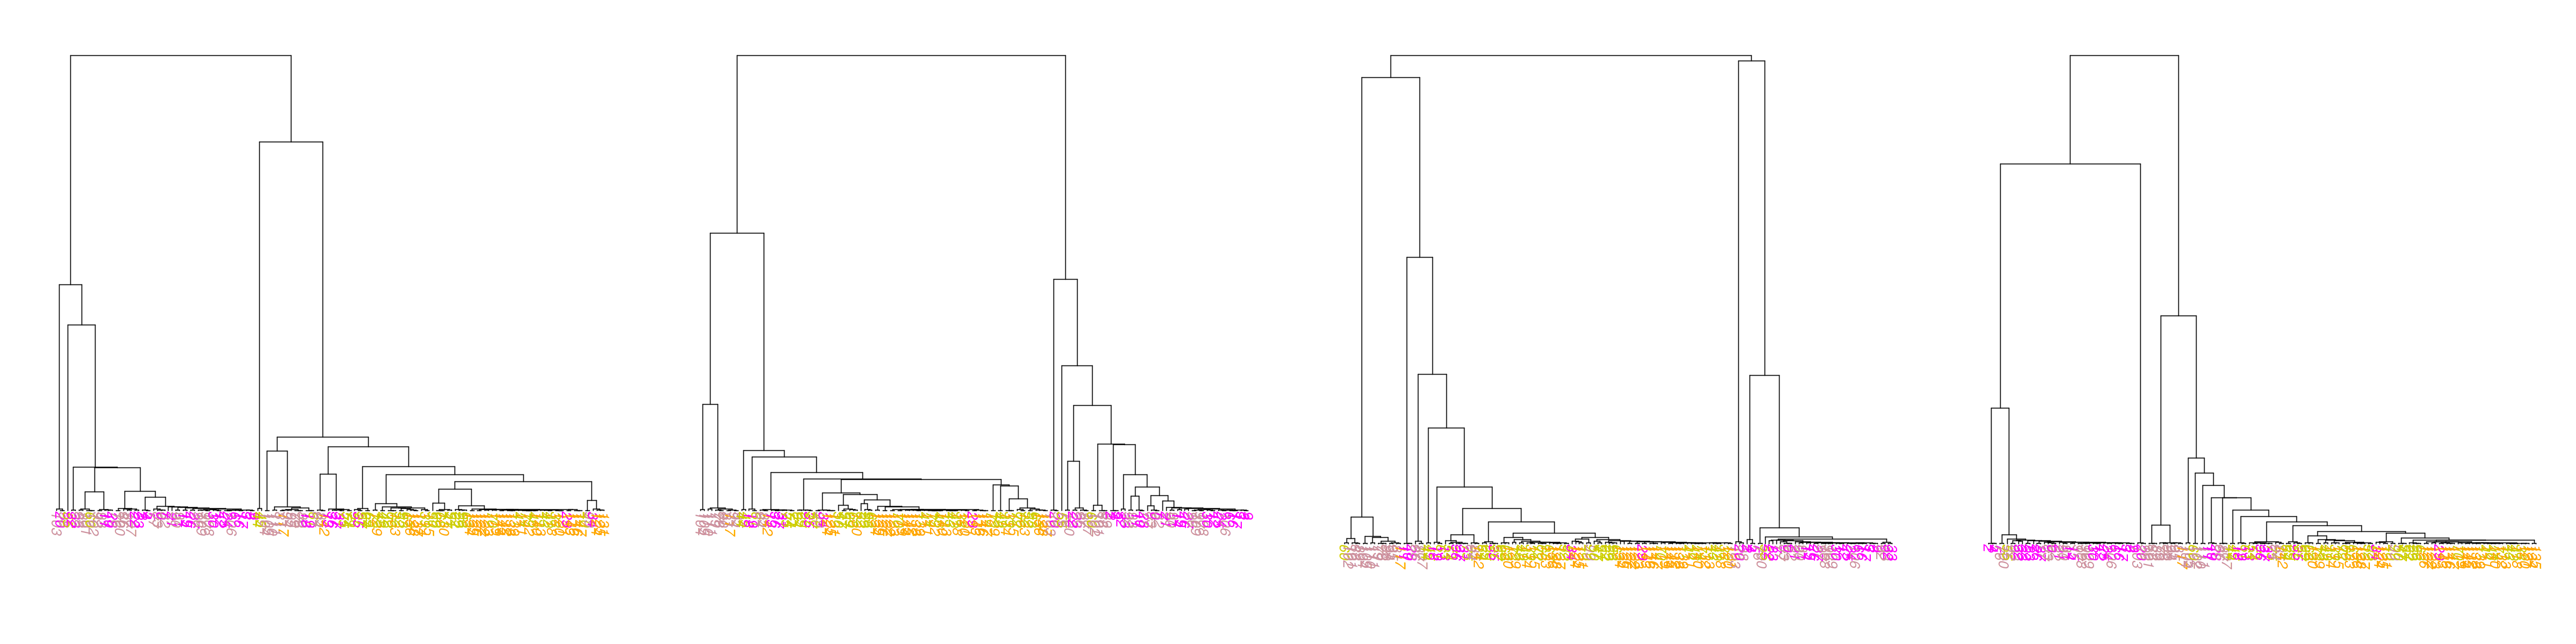

In [70]:
options(repr.plot.width=40, repr.plot.height=10)
par(mfrow=c(1,4))
rosTr1 = read.tree(text = as.character(treeList[1]))
tr=rosTr1; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

rosTr2 = read.tree(text = as.character(treeList[2]))
tr=rosTr2; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

rosTr3 = read.tree(text = as.character(treeList[3]))
tr=rosTr3; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

rosTr4 = read.tree(text = as.character(treeList[4]))
tr=rosTr4; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

## Plot trees with Relate

In [37]:
## Draw trees using Relate 
snpPos = c(52884471, 52884508, 52884548, 52884559)

source('./_scripts/treeView.R')
geneName = 'ros' 
PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr6/Chr6.haps.gz'
filename_sample = './Chr6/Chr6.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './Chr6/rel_chr6_joint.anc.gz'
filename_mut = './Chr6/rel_chr6_joint.mut.gz'
years_per_gen = 3

#### Check 1 – Draw trees with Relate
#### Use start postion as the bp_of_interest
rosList_check1 = list()
i = 1
for (snp in snpPos){
    
    start = dat6[which(dat6$start == snp), 'start']
    end = dat6[which(dat6$start == snp), 'end']
    snp = start
    cat(as.numeric(start),'\t', as.numeric(end),'\t', as.numeric(snp),'\n')
  
    filename_plot = paste('./treeViews/chr6_',geneName,'/check1_chr6_snp',snp,'_start',start,'_end',end,'_',geneName, sep='')
    plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                 filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                 makeFiles = FALSE)
  
    rosList_check1[[i]] = plt
    i = i+1
}

52884471 	 52884507 	 52884471 
52884508 	 52884547 	 52884508 
52884548 	 52884558 	 52884548 
52884559 	 52884580 	 52884559 


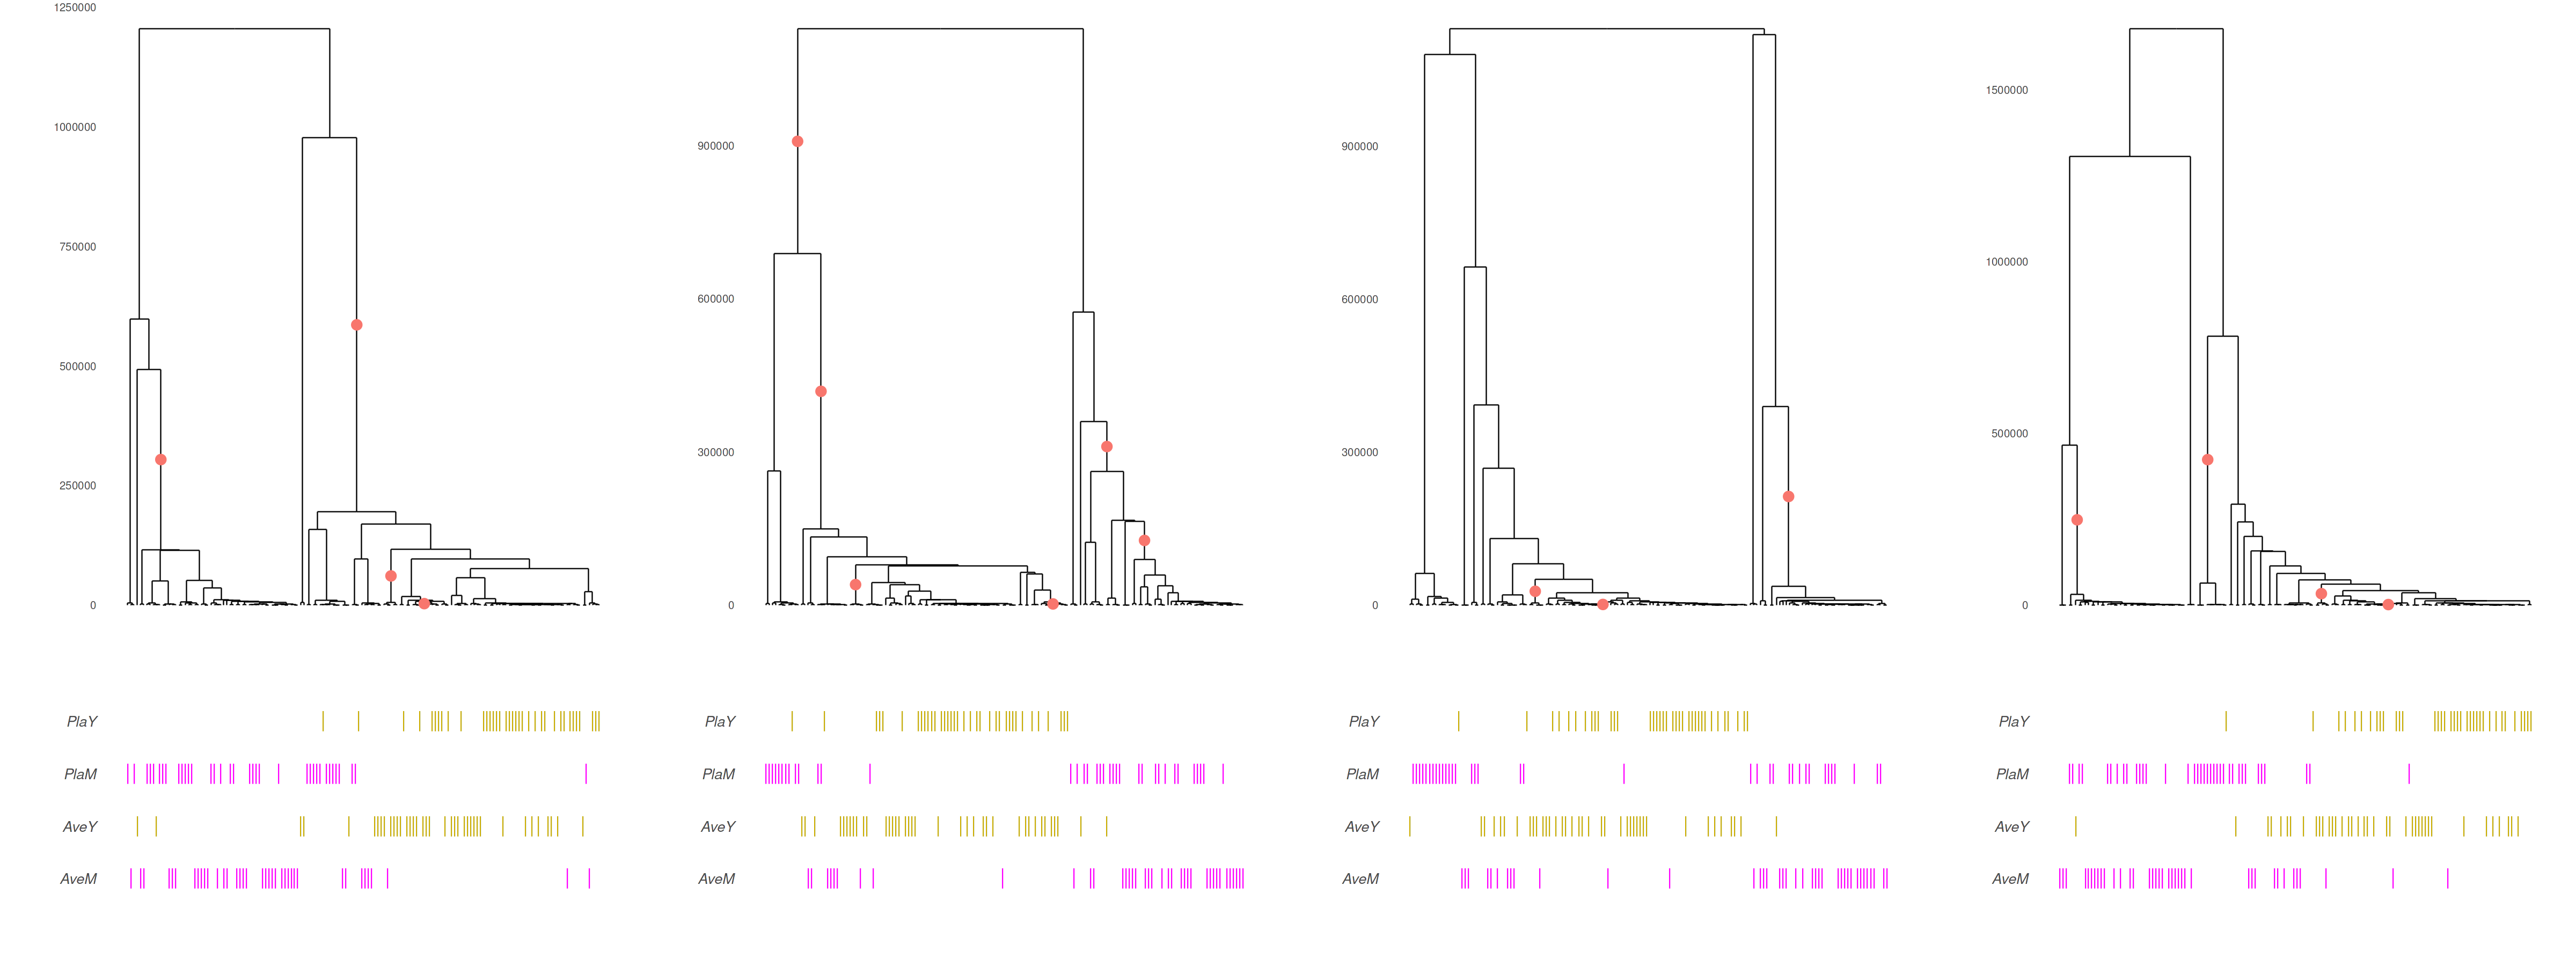

In [38]:
options(repr.plot.width=40, repr.plot.height=15)
pltList = rosList_check1; plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], nrow=1) ## snp = start

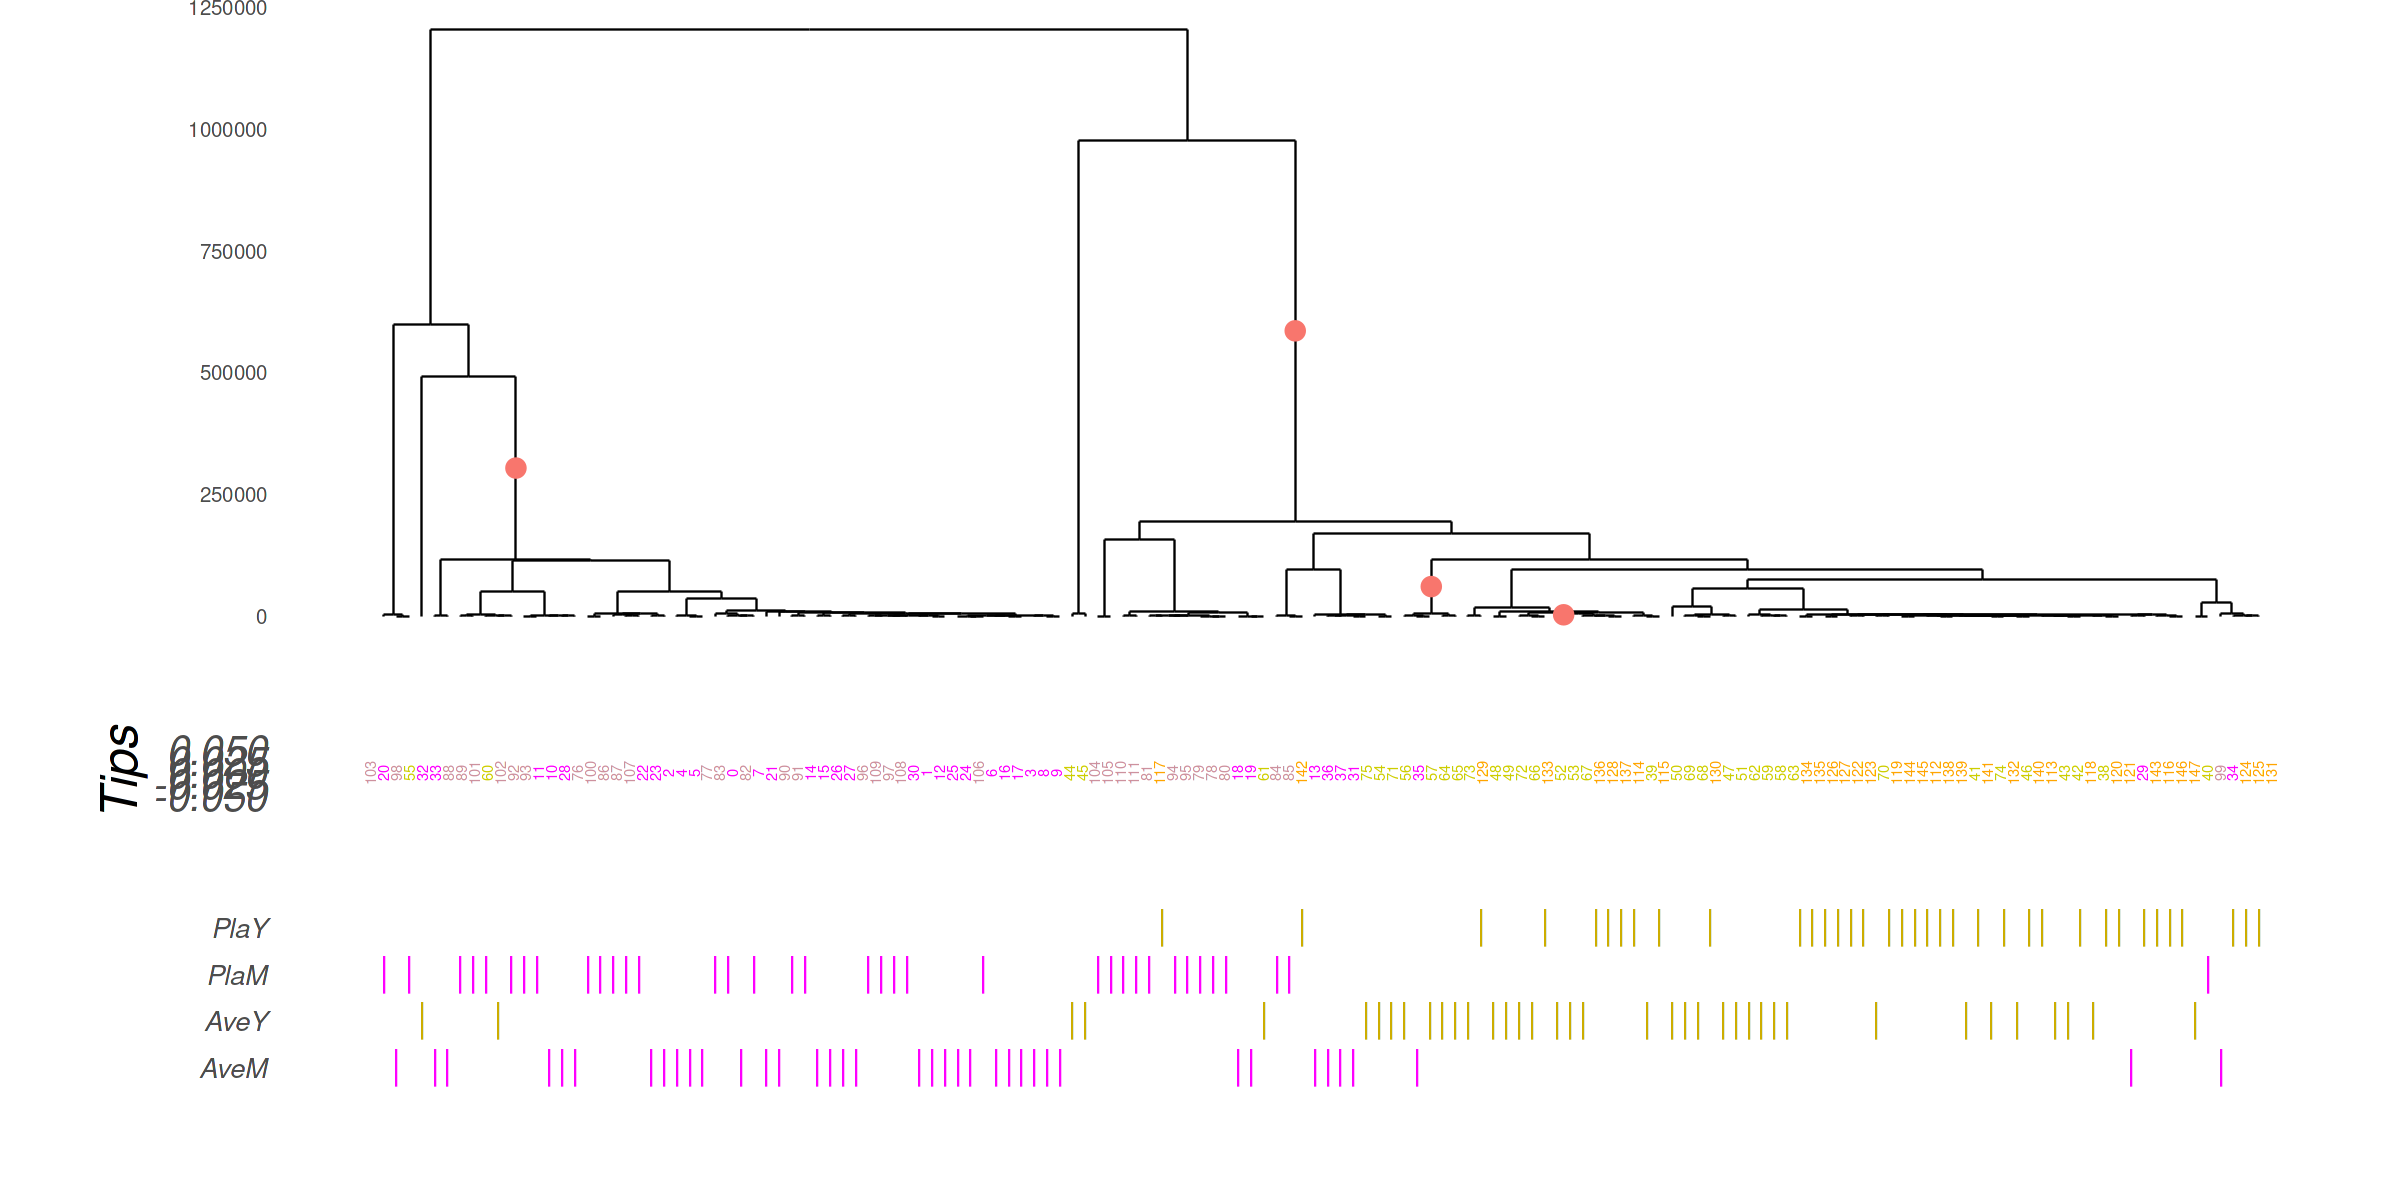

In [66]:
snp = 52884471
start = dat6[which(dat6$start == snp), 'start']
end = dat6[which(dat6$start == snp), 'end']
snp = start
filename_plot = paste('./treeViews/chr6_',geneName,'/check1_chr6_snp',snp,'_start',start,'_end',end,'_',geneName, sep='')
drawTreeWithTips(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                 filename_poplabels, years_per_gen, snp, filename_plot, geneName, tipInfo,
                 makeFiles = FALSE)

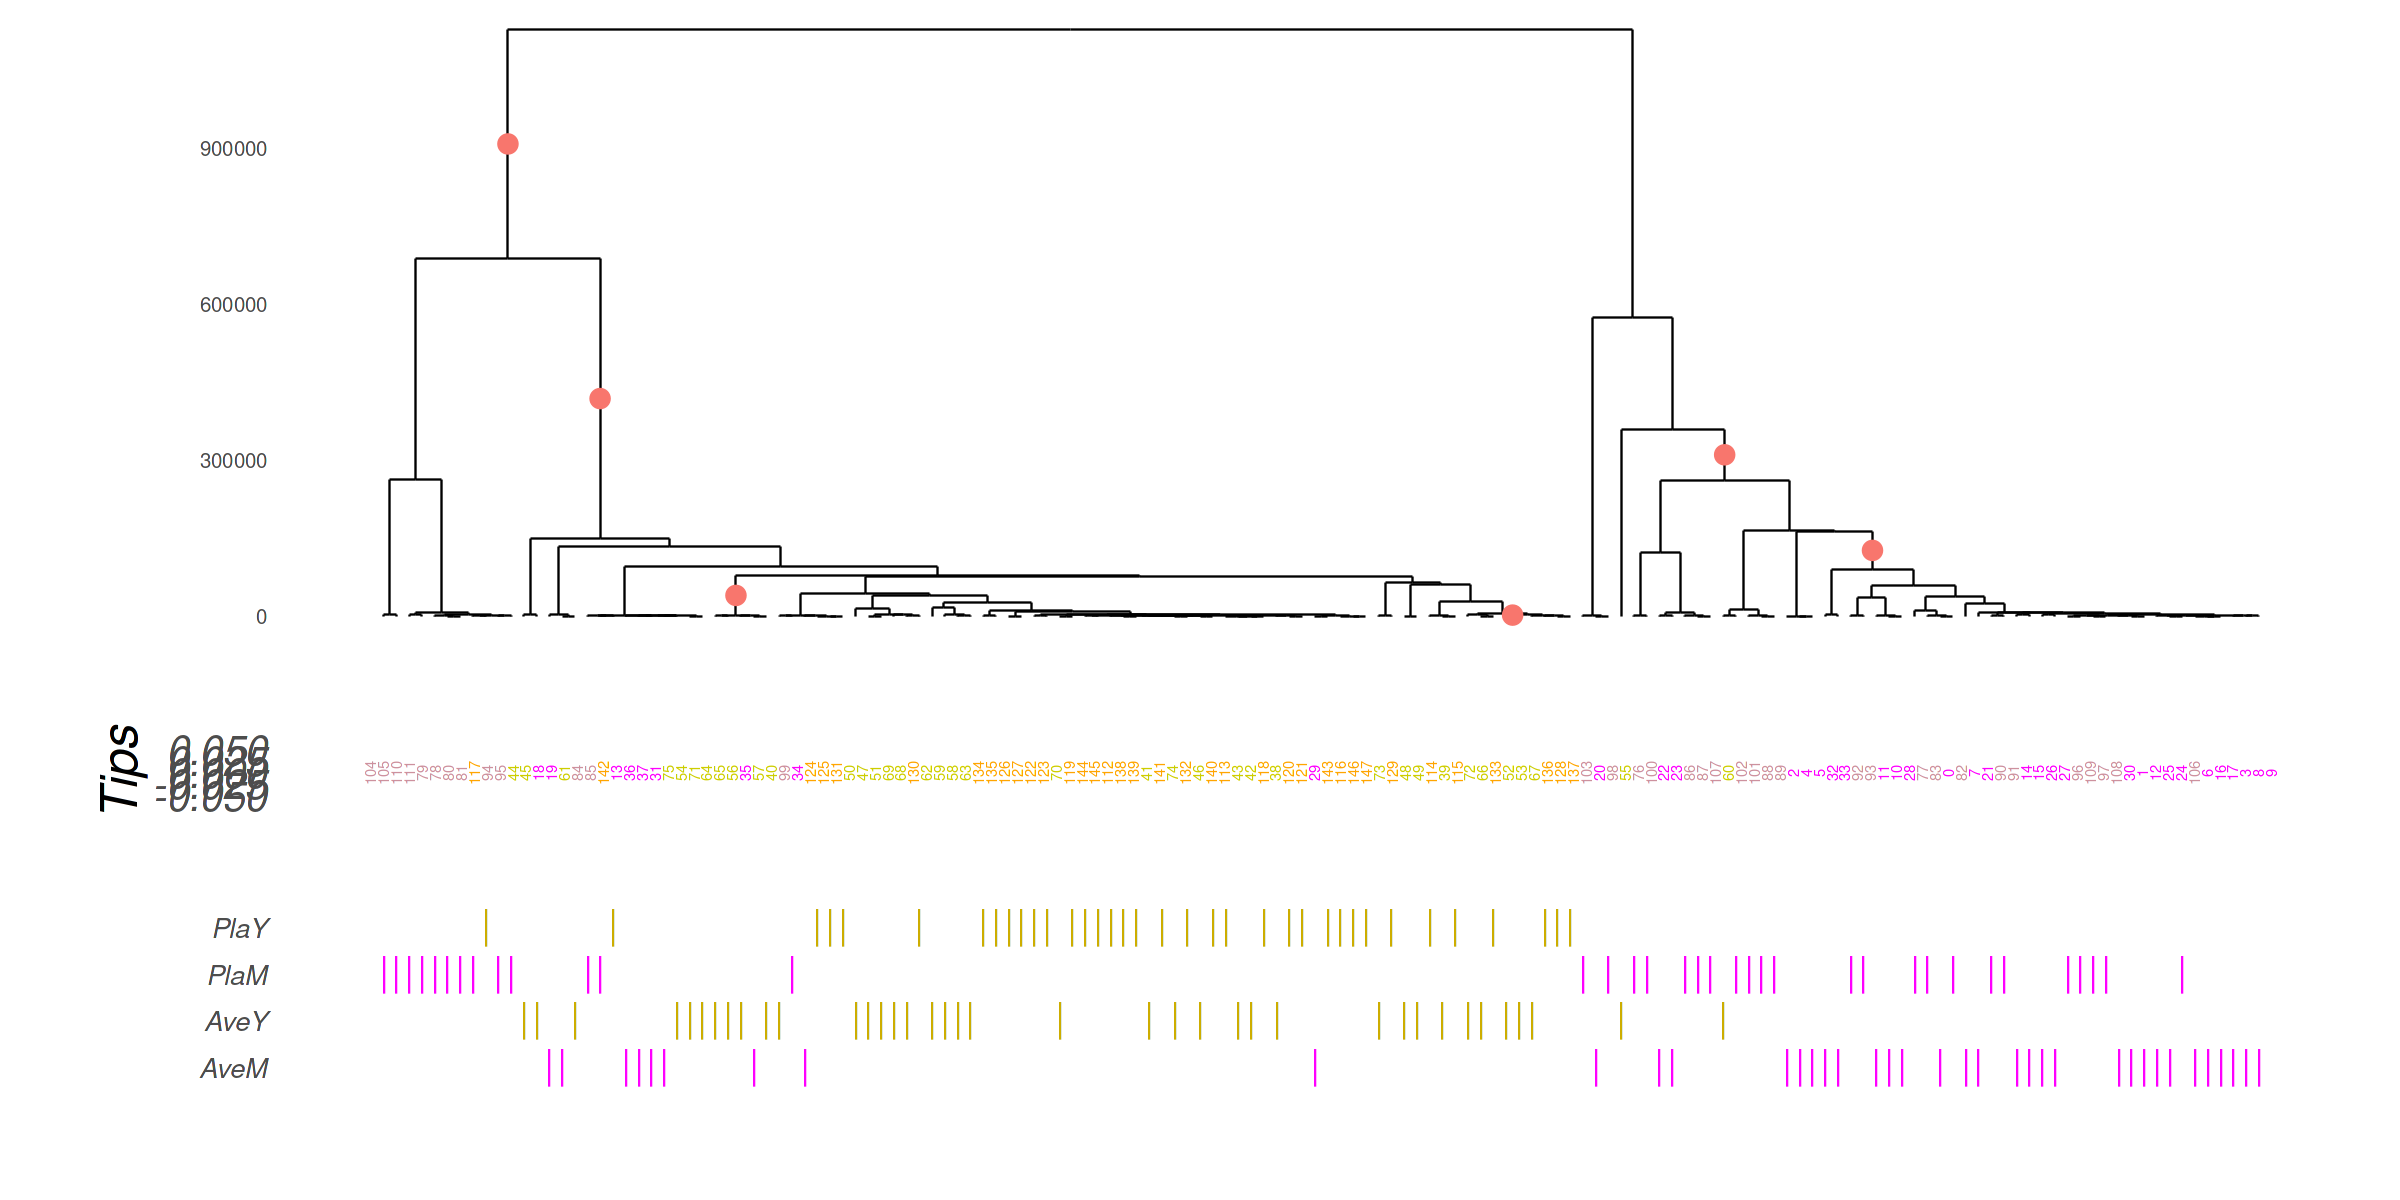

In [67]:
snp = 52884508
start = dat6[which(dat6$start == snp), 'start']
end = dat6[which(dat6$start == snp), 'end']
snp = start
filename_plot = paste('./treeViews/chr6_',geneName,'/check1_chr6_snp',snp,'_start',start,'_end',end,'_',geneName, sep='')
drawTreeWithTips(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                 filename_poplabels, years_per_gen, snp, filename_plot, geneName, tipInfo,
                 makeFiles = FALSE)

## Check mutations

In [26]:
filename_plot = './treeViews/chr6_ros/check1_chr6_snp52884471_start52884471_end52884507_ros'
plotcoords      <- read.table(paste(filename_plot,".plotcoords", sep = ""), header = T)
plotcoords[3:4] <- plotcoords[3:4] * years_per_gen
# print(plotcoords)
mut_on_branches     <- read.table(paste(filename_plot,".plotcoords.mut", sep = ""), header = T)
print(mut_on_branches)

       pos branchID
1 52883090      216
2 52884471      279
3 52884444      286
4 52884446      292


In [27]:
filename_plot = './treeViews/chr6_ros/check1_chr6_snp52884508_start52884508_end52884547_ros'
plotcoords      <- read.table(paste(filename_plot,".plotcoords", sep = ""), header = T)
plotcoords[3:4] <- plotcoords[3:4] * years_per_gen
# print(plotcoords)
mut_on_branches     <- read.table(paste(filename_plot,".plotcoords.mut", sep = ""), header = T)
print(mut_on_branches)

       pos branchID
1 52884471      205
2 52883090      213
3 52884508      284
4 52884531      287
5 52884446      288
6 52884444      291


In [28]:
filename_plot = './treeViews/chr6_ros/check1_chr6_snp52884548_start52884548_end52884558_ros'
plotcoords      <- read.table(paste(filename_plot,".plotcoords", sep = ""), header = T)
plotcoords[3:4] <- plotcoords[3:4] * years_per_gen
# print(plotcoords)
mut_on_branches     <- read.table(paste(filename_plot,".plotcoords.mut", sep = ""), header = T)
print(mut_on_branches)

       pos branchID
1 52883090      218
2 52884471      225
3 52884548      288


In [30]:
filename_plot = './treeViews/chr6_ros/check1_chr6_snp52884559_start52884559_end52884580_ros'
plotcoords      <- read.table(paste(filename_plot,".plotcoords", sep = ""), header = T)
plotcoords[3:4] <- plotcoords[3:4] * years_per_gen
# print(plotcoords)
mut_on_branches     <- read.table(paste(filename_plot,".plotcoords.mut", sep = ""), header = T)
print(mut_on_branches)

       pos branchID
1 52883090      218
2 52884471      230
3 52884559      276
4 52884548      285


In [31]:
 #    plotcoords      <- read.table(paste(filename_plot,".plotcoords", sep = ""), header = T)
	# plotcoords[3:4] <- plotcoords[3:4] * years_per_gen
	# mut_on_branches     <- read.table(paste(filename_plot,".plotcoords.mut", sep = ""), header = T)

	# muts <- subset(plotcoords, seg_type == "v" | seg_type == "t")
	# muts <- merge(mut_on_branches, muts, by = "branchID")

	# muts %>% group_by(branchID) %>% mutate(y_begin = (1:length(y_begin)) * (max(y_end) - min(y_begin))/(1+length(y_begin)) + min(y_begin), y_end = y_begin ) -> muts
	# mut <- read.table(filename_mut, skip = 1, sep = ";")
	# mut <- mut[,c(2,8)]
	# colnames(mut) <- c("pos", "is_flipped")
	# mut$is_flipped <- as.factor(mut$is_flipped)
	# muts <- merge(muts, mut, by = "pos")
	# # p <- geom_point(data = muts, aes(x = x_begin, y = y_begin, colour = is_flipped), ...)
